In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv("Karachi_House_Price_Dataset.csv",usecols=["Address","Price","NoOfBedrooms","NoOfBathrooms","AreaSqYards"])

In [111]:
df.head()

,Address,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards
0,"Bahria Town Karachi, Karachi",4200000.0,1.0,1.0,60
1,"Bahria Town - Precinct 17, Bahria Town Karachi",5900000.0,2.0,2.0,161
2,"Bahria Paradise, Bahria Town Karachi",42000000.0,5.0,5.0,500
3,"Askari 5 - Sector J, Askari 5",37500000.0,3.0,3.0,300
4,"Bahria Town - Precinct 35, Bahria Sports City",21000000.0,4.0,4.0,350


### Handling Missing Values

In [112]:
df.isnull().mean()*100

Address           0.000000
Price             0.000000
NoOfBedrooms     10.586118
NoOfBathrooms     0.791774
AreaSqYards       0.000000
dtype: float64

In [113]:
df["NoOfBedrooms"] = df["NoOfBedrooms"].fillna(3.0)

In [114]:
df.isnull().mean()*100

Address          0.000000
Price            0.000000
NoOfBedrooms     0.000000
NoOfBathrooms    0.791774
AreaSqYards      0.000000
dtype: float64

In [115]:
df["NoOfBathrooms"]=df["NoOfBathrooms"].fillna(3.0)

In [116]:
df.isnull().mean()*100

Address          0.0
Price            0.0
NoOfBedrooms     0.0
NoOfBathrooms    0.0
AreaSqYards      0.0
dtype: float64

<AxesSubplot: >

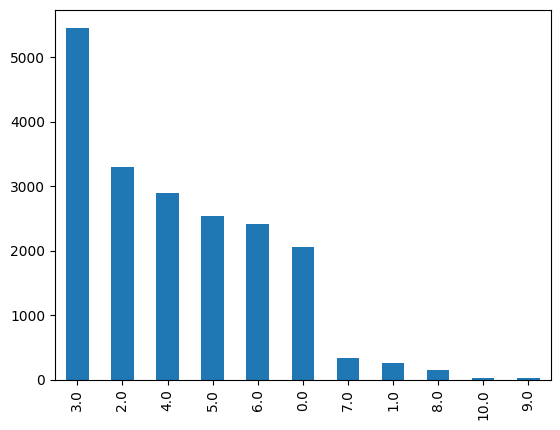

In [117]:
df["NoOfBathrooms"].value_counts().plot(kind="bar")

C:\Users\hp\AppData\Local\Temp\ipykernel_10816\941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<AxesSubplot: xlabel='Price', ylabel='Density'>

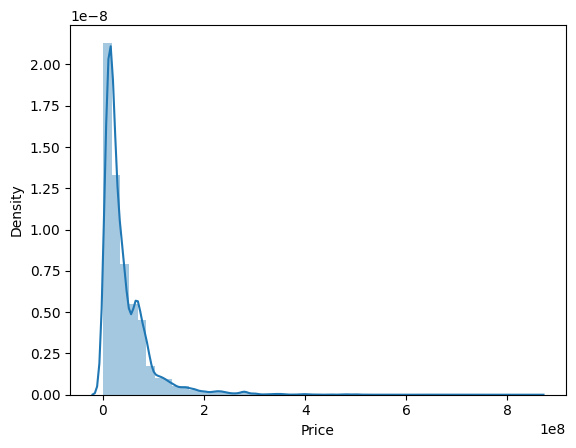

In [118]:
sns.distplot(df["Price"])

In [119]:
df["price_per_sqft"] = df["Price"]/(df["AreaSqYards"]+0.00001)

In [120]:
df.head()

,Address,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,price_per_sqft
0,"Bahria Town Karachi, Karachi",4200000.0,1.0,1.0,60,69999.988333
1,"Bahria Town - Precinct 17, Bahria Town Karachi",5900000.0,2.0,2.0,161,36645.960457
2,"Bahria Paradise, Bahria Town Karachi",42000000.0,5.0,5.0,500,83999.998320
3,"Askari 5 - Sector J, Askari 5",37500000.0,3.0,3.0,300,124999.995833
4,"Bahria Town - Precinct 35, Bahria Sports City",21000000.0,4.0,4.0,350,59999.998286


In [121]:
df.describe()

,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,price_per_sqft
count,1.945000e+04,19450.000000,19450.000000,19450.000000,1.945000e+04
mean,4.284362e+07,3.595476,3.388946,206.394807,4.070117e+11
std,5.104344e+07,1.450526,1.837485,151.815496,2.145146e+12
min,7.000000e+05,1.000000,0.000000,0.000000,6.842105e+03
25%,1.350000e+07,3.000000,2.000000,106.000000,9.499999e+04
50%,2.500000e+07,3.000000,3.000000,178.000000,1.450000e+05
75%,5.980000e+07,4.000000,5.000000,300.000000,2.250000e+05
max,8.500000e+08,11.000000,10.000000,993.000000,7.500000e+13


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19450 entries, 0 to 19449
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         19450 non-null  object 
 1   Price           19450 non-null  float64
 2   NoOfBedrooms    19450 non-null  float64
 3   NoOfBathrooms   19450 non-null  float64
 4   AreaSqYards     19450 non-null  int64  
 5   price_per_sqft  19450 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 911.8+ KB


In [123]:
df["Address"].value_counts()

Askari 5 - Sector J, Askari 5                                                              1116
DHA Phase 6, DHA Defence                                                                    694
DHA Phase 8, DHA Defence                                                                    543
Falcon Complex New Malir, Malir                                                             485
Askari 5, Malir Cantonment                                                                  484
                                                                                           ... 
10th Commercial Street - DHA Phase 4, DHA Phase 4                                             1
Scheme 33 - Sector 38-A, Scheme 33                                                            1
Korangi - Sector 31-A, Korangi Industrial Area                                                1
Muslimabad, Orangi Town                                                                       1
Al-Noor Multipurpose Cooperative Society

In [124]:
## Replacing Values with ocoourance less than one with "Others"
df["Address"] = df["Address"].apply(lambda x:x.strip())
location_count = df["Address"].value_counts()

In [125]:
location_counts_less_10 = location_count[location_count<=10]
location_counts_less_10
# These all will be replaced with others

Gulshan-e-Iqbal - Block 15, Gulshan-e-Iqbal                                                10
Wasi Country Park, Gulshan-e-Maymar                                                        10
Federal B Area - Block 14, Federal B Area                                                  10
Meraj One Luxury Apartments, Gulzar-e-Hijri                                                10
North Karachi - Sector 5-C/2, North Karachi - Sector 5-C                                   10
                                                                                           ..
10th Commercial Street - DHA Phase 4, DHA Phase 4                                           1
Scheme 33 - Sector 38-A, Scheme 33                                                          1
Korangi - Sector 31-A, Korangi Industrial Area                                              1
Muslimabad, Orangi Town                                                                     1
Al-Noor Multipurpose Cooperative Society Limited - Sector 54

In [126]:
df["Address"] = df["Address"].apply(lambda x:"other" if x in location_counts_less_10 else x)

In [127]:
df["Address"].value_counts()

other                                                               1726
Askari 5 - Sector J, Askari 5                                       1116
DHA Phase 6, DHA Defence                                             694
DHA Phase 8, DHA Defence                                             543
Falcon Complex New Malir, Malir                                      485
                                                                    ... 
Saadi Town - Block 2, Saadi Town                                      11
Federal B Area - Block 21, Federal B Area                             11
Naya Nazimabad - Block D, Naya Nazimabad                              11
Navy Housing Scheme Karsaz - Phase 3, Navy Housing Scheme Karsaz      11
Bahria Town - Precinct 7, Bahria Town Karachi                         11
Name: Address, Length: 293, dtype: int64

## Outlier Detection And Removal

In [128]:
df.describe()

,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,price_per_sqft
count,1.945000e+04,19450.000000,19450.000000,19450.000000,1.945000e+04
mean,4.284362e+07,3.595476,3.388946,206.394807,4.070117e+11
std,5.104344e+07,1.450526,1.837485,151.815496,2.145146e+12
min,7.000000e+05,1.000000,0.000000,0.000000,6.842105e+03
25%,1.350000e+07,3.000000,2.000000,106.000000,9.499999e+04
50%,2.500000e+07,3.000000,3.000000,178.000000,1.450000e+05
75%,5.980000e+07,4.000000,5.000000,300.000000,2.250000e+05
max,8.500000e+08,11.000000,10.000000,993.000000,7.500000e+13


In [129]:
df[(df["AreaSqYards"]/df["NoOfBedrooms"])<10]["AreaSqYards"].value_counts()

0     2213
1      326
2       47
4        4
80       1
11       1
27       1
5        1
Name: AreaSqYards, dtype: int64

In [130]:
df

,Address,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,price_per_sqft
0,"Bahria Town Karachi, Karachi",4200000.0,1.0,1.0,60,69999.988333
1,"Bahria Town - Precinct 17, Bahria Town Karachi",5900000.0,2.0,2.0,161,36645.960457
2,"Bahria Paradise, Bahria Town Karachi",42000000.0,5.0,5.0,500,83999.998320
3,"Askari 5 - Sector J, Askari 5",37500000.0,3.0,3.0,300,124999.995833
4,"Bahria Town - Precinct 35, Bahria Sports City",21000000.0,4.0,4.0,350,59999.998286
...,...,...,...,...,...,...
19445,"Gulshan-e-Iqbal - Block 13/D-1, Gulshan-e-Iqbal",4900000.0,2.0,2.0,67,73134.317443
19446,"Emaar Pearl Towers, Emaar Crescent Bay",67500000.0,3.0,4.0,243,277777.766347
19447,"Federal B Area, Karachi",4500000.0,2.0,1.0,67,67164.169080
19448,"Gulshan-e-Iqbal - Block 13/C, Gulshan-e-Iqbal",25000000.0,4.0,4.0,240,104166.662326


In [131]:
df = df[(df["AreaSqYards"]/df["NoOfBedrooms"])>10]
df

,Address,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,price_per_sqft
0,"Bahria Town Karachi, Karachi",4200000.0,1.0,1.0,60,69999.988333
1,"Bahria Town - Precinct 17, Bahria Town Karachi",5900000.0,2.0,2.0,161,36645.960457
2,"Bahria Paradise, Bahria Town Karachi",42000000.0,5.0,5.0,500,83999.998320
3,"Askari 5 - Sector J, Askari 5",37500000.0,3.0,3.0,300,124999.995833
4,"Bahria Town - Precinct 35, Bahria Sports City",21000000.0,4.0,4.0,350,59999.998286
...,...,...,...,...,...,...
19445,"Gulshan-e-Iqbal - Block 13/D-1, Gulshan-e-Iqbal",4900000.0,2.0,2.0,67,73134.317443
19446,"Emaar Pearl Towers, Emaar Crescent Bay",67500000.0,3.0,4.0,243,277777.766347
19447,"Federal B Area, Karachi",4500000.0,2.0,1.0,67,67164.169080
19448,"Gulshan-e-Iqbal - Block 13/C, Gulshan-e-Iqbal",25000000.0,4.0,4.0,240,104166.662326


In [132]:
df.describe()

,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,price_per_sqft
count,1.684900e+04,16849.000000,16849.00000,16849.000000,16849.000000
mean,3.914858e+07,3.599442,3.73856,238.193958,147881.248134
std,3.657066e+07,1.439704,1.46110,137.991019,81463.895028
min,7.000000e+05,1.000000,1.00000,33.000000,6842.105191
25%,1.350000e+07,3.000000,3.00000,122.000000,89743.583991
50%,2.600000e+07,3.000000,3.00000,200.000000,126666.662444
75%,5.800000e+07,5.000000,5.00000,311.000000,184426.221950
max,4.000000e+08,11.000000,10.00000,993.000000,818505.308950


In [133]:
df[df["NoOfBedrooms"]>10]

,Address,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards,price_per_sqft
363,"Gulshan-e-Iqbal - Block 6, Gulshan-e-Iqbal",77500000.0,11.0,6.0,400,193749.995156
3014,other,75000000.0,11.0,10.0,156,480769.199951
5402,"Shadman Town - Sector-14/B, Shadman",29800000.0,11.0,4.0,250,119199.995232
6631,other,42500000.0,11.0,6.0,300,141666.661944
7013,other,60000000.0,11.0,6.0,400,149999.996250
7097,"Capital Cooperative Housing Society, Scheme 33...",65000000.0,11.0,6.0,400,162499.995938
7350,other,58000000.0,11.0,6.0,400,144999.996375
10420,other,90000000.0,11.0,6.0,400,224999.994375
12034,other,17500000.0,11.0,6.0,120,145833.321181
12111,other,17500000.0,11.0,6.0,120,145833.321181


In [134]:
df.drop(columns=["price_per_sqft"],inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_10816\2623689826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["price_per_sqft"],inplace=True)


In [135]:
df.shape

(16849, 5)

### Cleaned Data

In [136]:
df.head()

,Address,Price,NoOfBedrooms,NoOfBathrooms,AreaSqYards
0,"Bahria Town Karachi, Karachi",4200000.0,1.0,1.0,60
1,"Bahria Town - Precinct 17, Bahria Town Karachi",5900000.0,2.0,2.0,161
2,"Bahria Paradise, Bahria Town Karachi",42000000.0,5.0,5.0,500
3,"Askari 5 - Sector J, Askari 5",37500000.0,3.0,3.0,300
4,"Bahria Town - Precinct 35, Bahria Sports City",21000000.0,4.0,4.0,350


In [137]:
df.to_csv("Cleaned_Data.csv")

In [138]:
x = df.drop(columns=["Price"])
y = df["Price"]

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [140]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [141]:
print(x_train.shape)
print(x_test.shape)

(13479, 4)
(3370, 4)


### Creating Pipeline and applying Linear Regression

In [142]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),["Address"]),
                                       remainder="passthrough")

In [143]:
scaler = StandardScaler()

In [144]:
lr = LinearRegression()

In [145]:
pipe = make_pipeline(column_trans,scaler,lr)

In [146]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Address'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [147]:
pipe.fit(x_train,y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Address'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [148]:
y_pred_lr = pipe.predict(x_test)

In [149]:
r2_score(y_test,y_pred_lr)

0.8274995311799969

## Applying Lasso

In [150]:
lasso = Lasso()

In [151]:
pipe = make_pipeline(column_trans,scaler,lasso)

In [152]:
pipe.fit(x_train,y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.317e+17, tolerance: 1.775e+15
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Address'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [153]:
y_pred_lasso = pipe.predict(x_test)

In [154]:
r2_score(y_test,y_pred_lr)

0.8274995311799969

## Applying Ridge 

In [155]:
ridge = Ridge()

In [156]:
pipe = make_pipeline(column_trans, scaler, ridge)

In [157]:
pipe.fit(x_train,y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['Address'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [158]:
y_pred_ridge=pipe.predict(x_test)

In [159]:
r2_score(y_test,y_pred_lr)

0.8274995311799969

In [160]:
print("No Regularization: ",r2_score(y_test,y_pred_lr))
print("Lasso: ",r2_score(y_test,y_pred_lasso))
print("Ridge: ",r2_score(y_test,y_pred_ridge))

No Regularization:  0.8274995311799969
Lasso:  0.8275382602565229
Ridge:  0.8275329142461575


In [161]:
import pickle

In [163]:
pickle.dump(pipe,open("RidgeModel.pkl","wb"))